# Final Phase 03 Project

**Student Name:** Allan Kiplagat  
**Group:** Remote Full-time  
**Date:** [Enter Date]  
**Technical mentor:** [Enter Instructor Name]  
**Github url:** https://github.com/Allan-Kipkemei/Dsc-phase-3-project

**Data source:** : https://www.kaggle.com/datasets/city-of-seattle/seattle-terry-stops



For this investigation, I will examine a dataset containing details about police-reported stops conducted under the legal framework Terry Stops. This dataset will serve as the basis for a classification analysis aimed at predicting whether an arrest occurred as the final outcome of a Terry stop conducted by the police. In Terry stops, officers detain individuals based on a "reasonable suspicion" that they may be involved in criminal activity.

Steps for classifications

Feed the data into the notebook: Acquire the dataset, perform an initial exploration, and gather all essential information and materials required.

Clean: Process and clean the data to ready it for analysis. This step may involve converting data to appropriate types, eliminating unnecessary columns or data, and restructuring data as necessary.

Explore: Delve into the dataset through analyses and visualizations to uncover deeper insights into the dataset's patterns and trends.

Modellling: Create and train an appropriate model customized to the dataset. Refine and validate the model to ensure it accurately captures the underlying patterns within the data.

Interpretation: Analyze the outcomes of the model and evaluate their implications. Effectively communicate these findings to relevant stakeholders to ensure a clear understanding of the insights derived from the analysis.

<h1>Section 1</h1>
Importing the tonnes of libraries necessary for modelling , EDA scrubbing etcetra!

In [5]:
# Standard Libraries
import warnings
import itertools
from datetime import datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning & Evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier


# Setting styles and ignoring warnings
sns.set(style='white')
plt.style.use("ggplot")
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')
%matplotlib inline


I opted to use google drive to host the csv file so that I can just call the url endpoint

In [7]:
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1d2ur0h9lUlIrL5pnEAgBwDLTYoHrdm81' )
df.head()



,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,33946835189,20220000130414,33946824861,Field Contact,-,7482,1979,M,White,...,02:39:36.0000000,VICE - PROSTITUTION,VICE - PROSTITUTION,ONVIEW,WEST PCT 3RD W - MARY - PLATOON 1,N,N,West,K,K1
1,-,-1,20170000005258,342036,Field Contact,NaN,6355,1970,F,White,...,06:17:00.0000000,-,-,-,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,-,-,-
2,26 - 35,7733349602,20190000263182,8628041748,Arrest,-,6262,1973,M,White,...,06:24:25.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--PROWLER - TRESPASS,911,SOUTHWEST PCT 1ST W - FRANK - PLATOON 2,Y,N,Southwest,F,F2
3,36 - 45,-1,20160000005118,217915,Field Contact,NaN,5803,1971,M,American Indian/Alaska Native,...,16:38:00.0000000,-,-,-,WEST PCT 2ND W - DAVID BEATS,N,N,North,U,U3
4,46 - 55,-1,20150000227032,60297,Offense Report,Lethal Cutting Instrument,6355,1970,F,White,...,08:55:00.0000000,DISTURBANCE,"--WEAPON,PERSON WITH - OTHER WEAPON",911,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,Y,East,E,E1


Cleaning our data to be fit for EDA and modelling

In [8]:
# explore our dataset further

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60102 entries, 0 to 60101
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         60102 non-null  object
 1   Subject ID                60102 non-null  int64 
 2   GO / SC Num               60102 non-null  int64 
 3   Terry Stop ID             60102 non-null  int64 
 4   Stop Resolution           60102 non-null  object
 5   Weapon Type               27537 non-null  object
 6   Officer ID                60102 non-null  object
 7   Officer YOB               60102 non-null  int64 
 8   Officer Gender            60102 non-null  object
 9   Officer Race              60102 non-null  object
 10  Subject Perceived Race    60102 non-null  object
 11  Subject Perceived Gender  60102 non-null  object
 12  Reported Date             60102 non-null  object
 13  Reported Time             60102 non-null  object
 14  Initial Call Type     

In [9]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.010200e+04,6.010200e+04,6.010200e+04,60102.000000
mean,6.867083e+09,2.018584e+13,1.148222e+10,1983.999917
std,1.204292e+10,8.612461e+10,1.674581e+10,9.475162
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.347038e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.026000e+05,1986.000000
75%,7.747701e+09,2.020000e+13,1.802688e+10,1991.000000
max,5.656557e+10,2.024000e+13,5.656558e+10,2002.000000


In [10]:
# Check for null values:
print('row----- Column---- :',df.shape,'\n')
print(df.isna().sum())

row----- Column---- : (60102, 23) 

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 557
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64


## Convert 'Stop Resolution' Column to Binary (0 or 1) for Arrested or Not Arrested

To convert the 'Stop Resolution' column in the DataFrame to binary values (0 for not arrested and 1 for arrested), we can use the `.map()` function to map specific values to 0 or 1. Here's the code snippet:

```python
df['Stop Resolution'] = df['Stop Resolution'].map({
    'Arrest': 1, 
    'Field Contact': 0,
    'Offense Report': 0,
    'Referred for Prosecution': 0,
    'Citation / Infraction': 0
})

In [11]:
# column to binary 0 or 1 Arrested or not arrested
df['Stop Resolution'] = df['Stop Resolution'].map({'Arrest': 1, 'Field Contact': 0,'Offense Report': 0,
                                                   'Referred for Prosecution': 0,'Citation / Infraction': 0})
df['Stop Resolution'].value_counts()

Stop Resolution
0    45473
1    14629
Name: count, dtype: int64

In [12]:
# Convert the 'Reported Date' column to datetime format
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

# Create a dictionary for mapping month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Add a new column for the month name
df['Month'] = df['Reported Date'].dt.month.map(month_mapping)

# Add new columns for the day and year
df['Day'] = df['Reported Date'].dt.day
df['Year'] = df['Reported Date'].dt.year


## Mapping Weapon Types to Categories

To categorize different weapon types into broader categories such as "Firearm" and "Non-Firearm," we create a dictionary (`weapon_mapping`) and then map the weapon types in the DataFrame to these categories. Here's the relevant code:


In [13]:
# Create a dictionary to map weapon types to categories
weapon_mapping = {
    'Lethal Cutting Instrument': 'Non-Firearm', 
    'Knife/Cutting/Stabbing Instrument': 'Non-Firearm',
    'Club, Blackjack, Brass Knuckles': 'Non-Firearm',
    'Blunt Object/Striking Implement': 'Non-Firearm',
    'Mace/Pepper Spray': 'Non-Firearm', 
    'Club': 'Non-Firearm',
    'Taser/Stun Gun': 'Non-Firearm', 
    'Blackjack': 'Non-Firearm',
    'Brass Knuckles': 'Non-Firearm', 
    'Fire/Incendiary Device': 'Non-Firearm',
    'Handgun': 'Firearm',
    'Firearm Other': 'Firearm',
    'Firearm (unk type)': 'Firearm',
    'Firearm': 'Firearm',
    
    'Other Firearm': 'Firearm', 
    'Rifle': 'Firearm',
    'Shotgun': 'Firearm',
    'Automatic Handgun': 'Firearm',
    'None': 'None',
    '-': 'None',
    'None/Not Applicable': 'None'
}

# Map the weapon types to the categories
df['Weapon Type'] = df['Weapon Type'].map(weapon_mapping)


In [14]:
# Change Officer year of birth to give the officer age:
df['Officer Age'] = 2020-df['Officer YOB']

In [15]:
df

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Month,Day,Year,Officer Age
0,26 - 35,33946835189,20220000130414,33946824861,0,None,7482,1979,M,White,...,WEST PCT 3RD W - MARY - PLATOON 1,N,N,West,K,K1,May,24,2022,41
1,-,-1,20170000005258,342036,0,NaN,6355,1970,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,-,-,-,November,19,2017,50
2,26 - 35,7733349602,20190000263182,8628041748,1,None,6262,1973,M,White,...,SOUTHWEST PCT 1ST W - FRANK - PLATOON 2,Y,N,Southwest,F,F2,July,18,2019,47
3,36 - 45,-1,20160000005118,217915,0,NaN,5803,1971,M,American Indian/Alaska Native,...,WEST PCT 2ND W - DAVID BEATS,N,N,North,U,U3,December,4,2016,49
4,46 - 55,-1,20150000227032,60297,0,Non-Firearm,6355,1970,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,Y,East,E,E1,July,4,2015,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,7727744717,20190000194493,8252118453,0,None,7717,1991,F,White,...,SOUTH PCT 3RD W - SAM - PLATOON 2,N,Y,South,S,S1,May,30,2019,29
60098,36 - 45,8331727148,20200000160213,13172913355,1,None,7758,1987,M,White,...,EAST PCT 2ND W - BEATS,Y,N,West,M,M3,May,15,2020,33
60099,26 - 35,20176905289,20210000329258,30544207813,1,None,8486,1992,M,Asian,...,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,Y,N,-,-,-,December,14,2021,28
60100,26 - 35,-1,20190000112517,546819,1,NaN,8557,1992,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,East,E,E1,March,30,2019,28


## Dropping Unnecessary Columns

To streamline our dataset and focus on relevant information, we'll drop certain columns that we don't need. Here's the code to drop these columns from the DataFrame:


In [16]:
# Drop columns that we are not going to need:
df.drop(columns=['Subject ID','GO / SC Num','Officer ID','Officer YOB','Officer Race',
                'Subject Perceived Gender','Subject Perceived Race','Reported Date','Reported Time','Call Type',
                'Officer Squad', 'Sector','Beat','Initial Call Type','Final Call Type','Day'],axis=1, inplace=True)
# See what our final dataset looks like
df.head()

df 

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year,Officer Age
0,26 - 35,33946824861,0,None,M,N,N,West,May,2022,41
1,-,342036,0,NaN,F,N,N,-,November,2017,50
2,26 - 35,8628041748,1,None,M,Y,N,Southwest,July,2019,47
3,36 - 45,217915,0,NaN,M,N,N,North,December,2016,49
4,46 - 55,60297,0,Non-Firearm,F,N,Y,East,July,2015,50
...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,8252118453,0,None,F,N,Y,South,May,2019,29
60098,36 - 45,13172913355,1,None,M,Y,N,West,May,2020,33
60099,26 - 35,30544207813,1,None,M,Y,N,-,December,2021,28
60100,26 - 35,546819,1,NaN,F,N,N,East,March,2019,28


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60102 entries, 0 to 60101
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subject Age Group  60102 non-null  object
 1   Terry Stop ID      60102 non-null  int64 
 2   Stop Resolution    60102 non-null  int64 
 3   Weapon Type        27534 non-null  object
 4   Officer Gender     60102 non-null  object
 5   Arrest Flag        60102 non-null  object
 6   Frisk Flag         60102 non-null  object
 7   Precinct           60102 non-null  object
 8   Month              60102 non-null  object
 9   Year               60102 non-null  int32 
 10  Officer Age        60102 non-null  int64 
dtypes: int32(1), int64(3), object(7)
memory usage: 4.8+ MB


<h1>Exploring further our data</h1>

## Visualizing Numerical Features with Histograms

To gain insights into the distribution of numerical features in our dataset, we can create histograms for each numerical feature. Here's the code to achieve this:


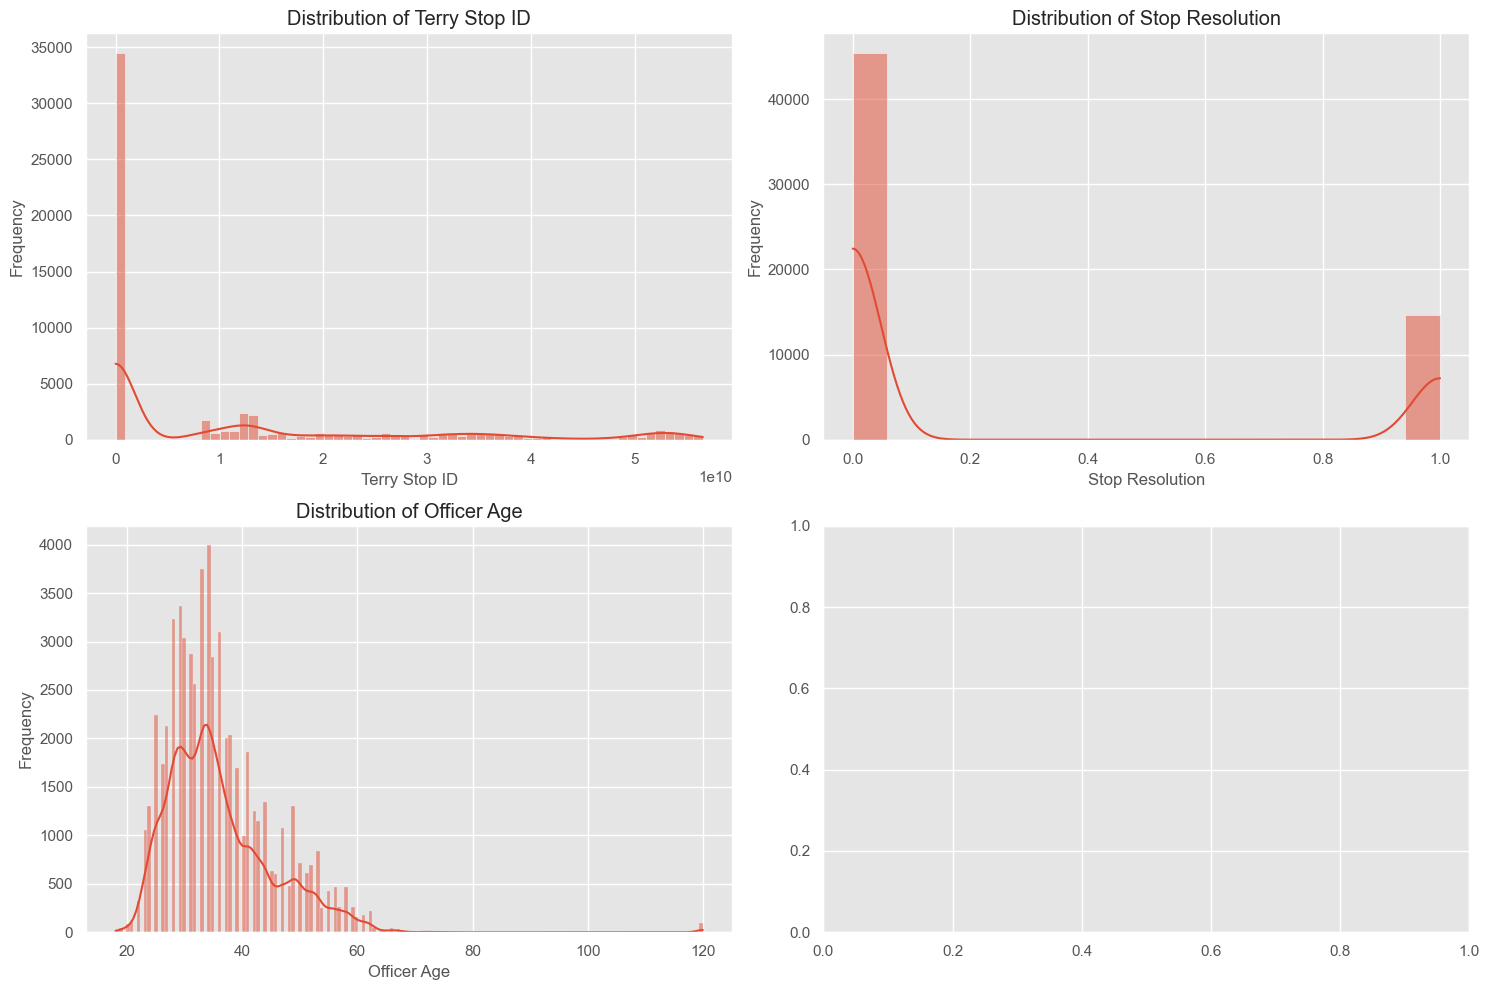

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
num_cols = 2  # Number of columns for subplots
num_rows = (len(numerical_features) + 1) // num_cols  # Number of rows for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten axes if necessary
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
'''import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'
sns.pairplot(df)
plt.title('Pairplot of Various Measurements')
plt.xlabel('Measurements')
plt.ylabel('Measurements')
plt.show()

from statsmodels.graphics.mosaicplot import mosaic

# Example mosaic plot for two categorical variables 'Arrest Flag' and 'Frisk Flag'
mosaic(df, ['Arrest Flag', 'Frisk Flag'], title='Mosaic Plot of Arrest and Frisk Status')
plt.xlabel('Arrest Status')
plt.ylabel('Frisk Status')
plt.show()


from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Example hierarchical clustering based on numeric columns in the DataFrame
# Assuming your DataFrame is called 'df' and you want to cluster based on numeric columns only
data_for_clustering = df.select_dtypes(include=['int64', 'float64'])
linkage_matrix = linkage(data_for_clustering, method='ward')  # you can choose other linkage methods as well
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Assuming your DataFrame is called 'df'\nsns.pairplot(df)\nplt.title('Pairplot of Various Measurements')\nplt.xlabel('Measurements')\nplt.ylabel('Measurements')\nplt.show()\n\nfrom statsmodels.graphics.mosaicplot import mosaic\n\n# Example mosaic plot for two categorical variables 'Arrest Flag' and 'Frisk Flag'\nmosaic(df, ['Arrest Flag', 'Frisk Flag'], title='Mosaic Plot of Arrest and Frisk Status')\nplt.xlabel('Arrest Status')\nplt.ylabel('Frisk Status')\nplt.show()\n\n\nfrom scipy.cluster.hierarchy import linkage, dendrogram\nimport matplotlib.pyplot as plt\n\n# Example hierarchical clustering based on numeric columns in the DataFrame\n# Assuming your DataFrame is called 'df' and you want to cluster based on numeric columns only\ndata_for_clustering = df.select_dtypes(include=['int64', 'float64'])\nlinkage_matrix = linkage(data_for_clustering, method='ward')  # you can choose other linkage methods as well\nplt.figure(figsiz

## Visualizing Percentage of Arrested vs. Not Arrested

To visualize the percentage of arrests compared to not arrested instances in our dataset, we can create a horizontal bar chart. Here's the code to achieve this:


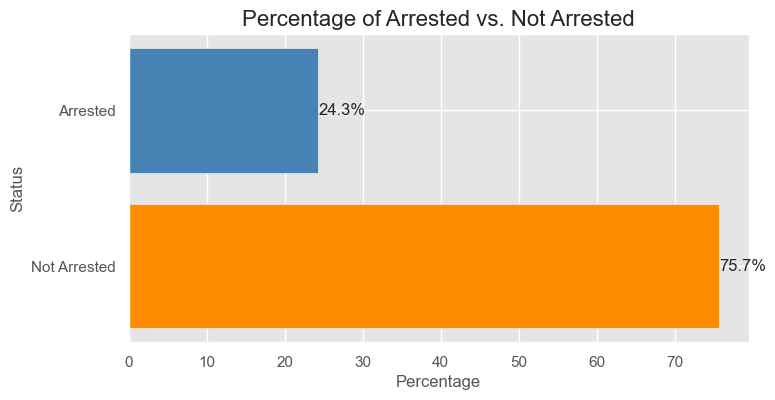

In [20]:
import matplotlib.pyplot as plt

# Calculate the sizes for arrested and not arrested
arrested_count = df['Stop Resolution'].sum()
total_count = len(df['Stop Resolution'])
not_arrested_count = total_count - arrested_count

# Calculate percentages
arrested_percent = (arrested_count / total_count) * 100
not_arrested_percent = (not_arrested_count / total_count) * 100

# Define data for the horizontal bar chart
categories = ['Arrested', 'Not Arrested']
percentages = [arrested_percent, not_arrested_percent]
colors = ['steelblue', 'darkorange']

# Create the horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(categories, percentages, color=colors)

# Add percentages on bars
for i, percentage in enumerate(percentages):
    plt.text(percentage, i, f'{percentage:.1f}%', va='center', fontsize=12)

# Add title and labels
plt.title('Percentage of Arrested vs. Not Arrested', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Status', fontsize=12)

# Invert y-axis for better readability
plt.gca().invert_yaxis()

plt.show()


In [21]:
df

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year,Officer Age
0,26 - 35,33946824861,0,None,M,N,N,West,May,2022,41
1,-,342036,0,NaN,F,N,N,-,November,2017,50
2,26 - 35,8628041748,1,None,M,Y,N,Southwest,July,2019,47
3,36 - 45,217915,0,NaN,M,N,N,North,December,2016,49
4,46 - 55,60297,0,Non-Firearm,F,N,Y,East,July,2015,50
...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,8252118453,0,None,F,N,Y,South,May,2019,29
60098,36 - 45,13172913355,1,None,M,Y,N,West,May,2020,33
60099,26 - 35,30544207813,1,None,M,Y,N,-,December,2021,28
60100,26 - 35,546819,1,NaN,F,N,N,East,March,2019,28


## Visualizing Categorical Data Distributions

To visualize the distributions of categorical data in our dataset, we can create a grid of bar plots, each representing the distribution of a specific categorical column. Here's the code to achieve this:


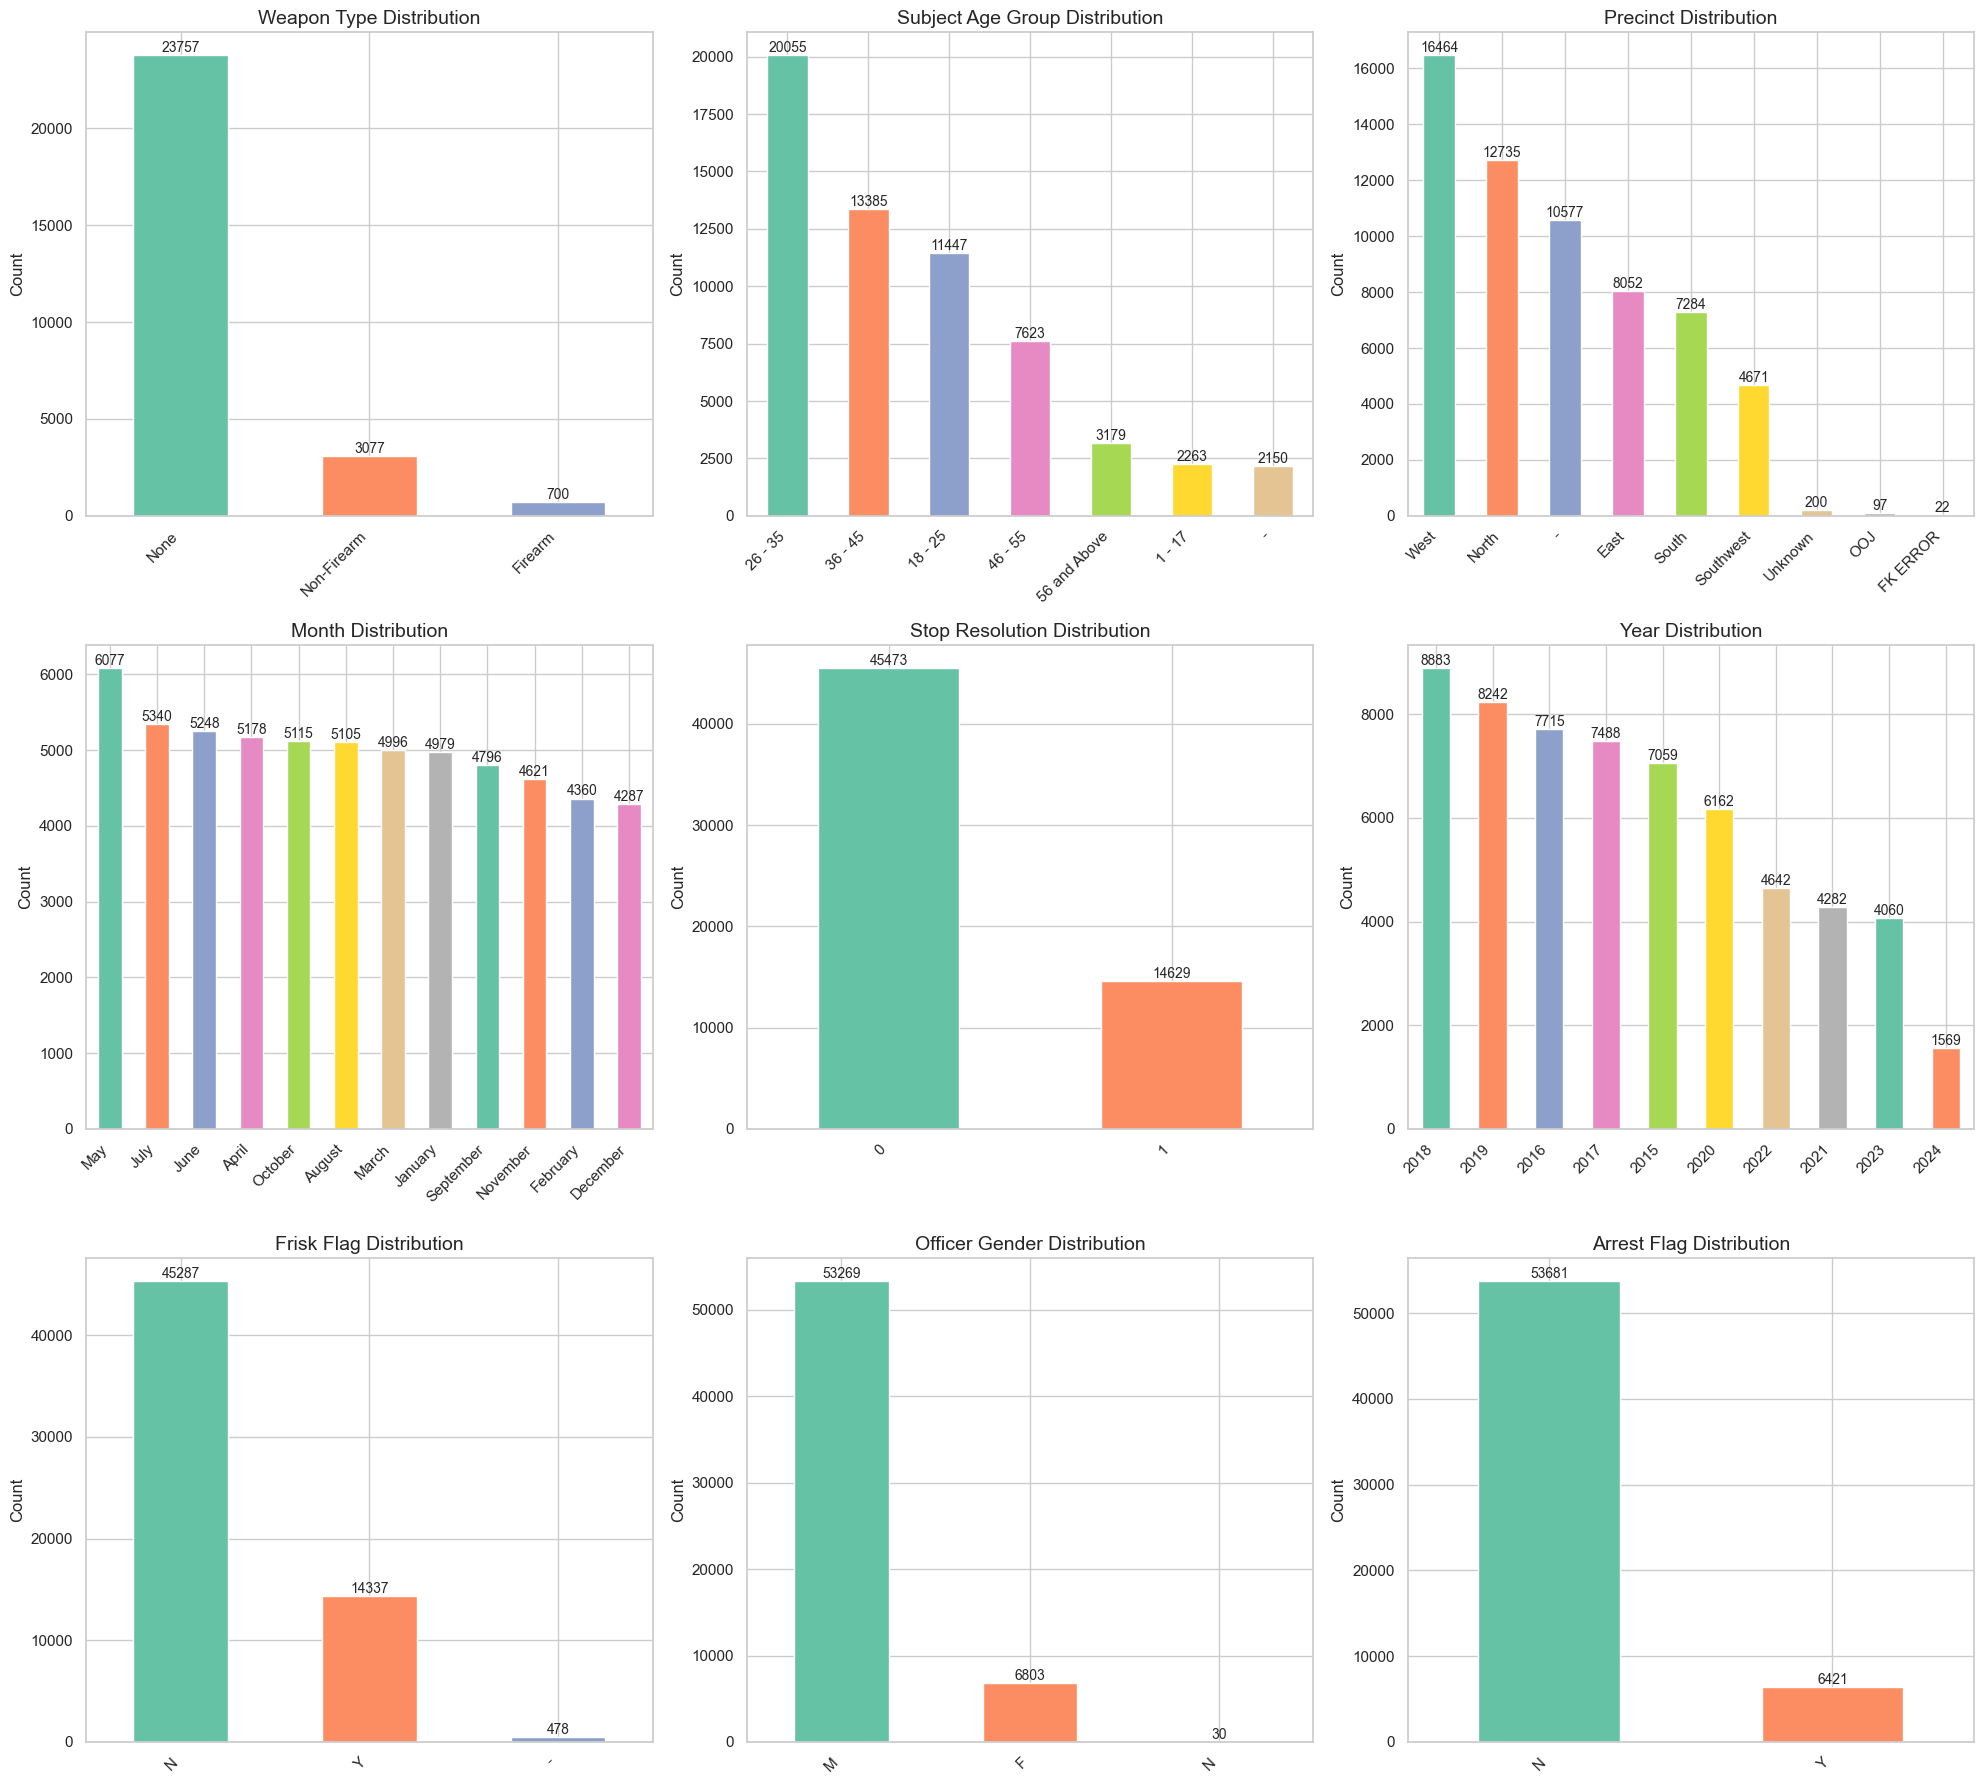

In [22]:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Set the overall style and color palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("Set2")

    # Create the figure and define the size
    fig, axes = plt.subplots(3, 3, figsize=(20, 18))

    # List of columns to plot and their titles, reshuffled
    columns = [
        ('Weapon Type', 'Weapon Type Distribution'),
        ('Subject Age Group', 'Subject Age Group Distribution'),
        ('Precinct', 'Precinct Distribution'),
        ('Month', 'Month Distribution'),
        ('Stop Resolution', 'Stop Resolution Distribution'),
        ('Year', 'Year Distribution'),
        ('Frisk Flag', 'Frisk Flag Distribution'),
        ('Officer Gender', 'Officer Gender Distribution'),
        ('Arrest Flag', 'Arrest Flag Distribution')
    ]

    # Plot each column in its own subplot
    for ax, (col, title) in zip(axes.flatten(), columns):
        data_to_plot = df[col].value_counts()
        data_to_plot.plot(kind='bar', ax=ax, color=palette)
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('Count', fontsize=12)
        
        # Rotate x-axis labels for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Annotate bars with counts
        for i, v in enumerate(data_to_plot):
            ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=10)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


## Comparing Percentage of On-Site Arrests vs. Final Arrests Per Month

To compare the percentage of arrests made during the Terry stop on-site with the percentage of arrests as a final resolution per month, we can create a bar chart. Here's the code to achieve this:


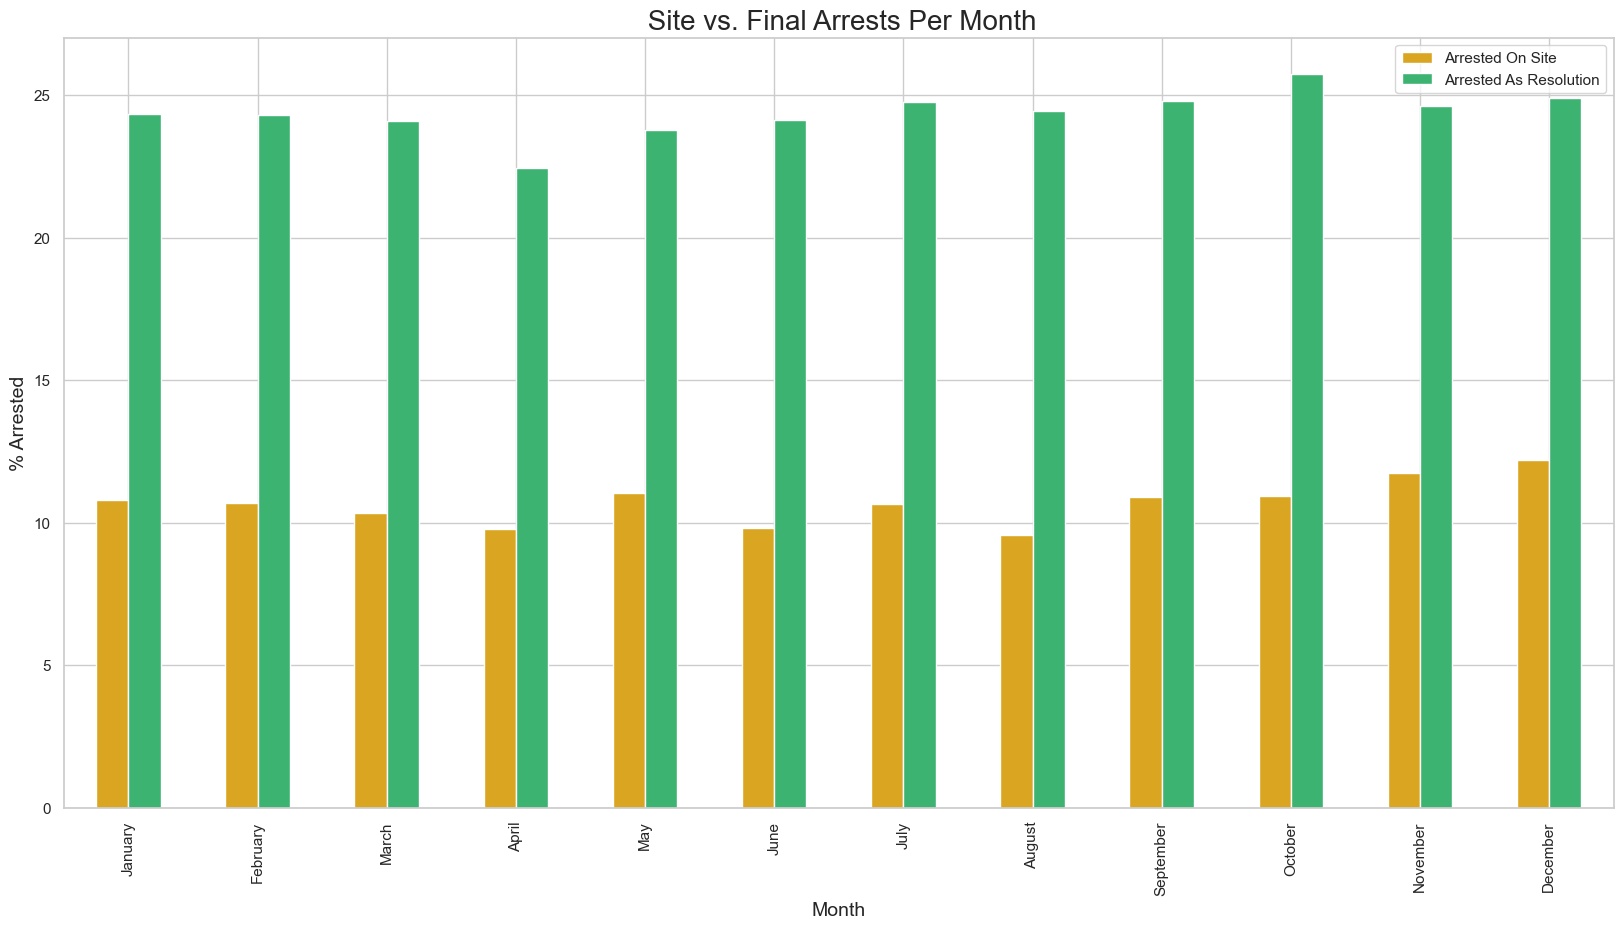

In [23]:
# Collect all rows of data where there was an arrest flag, meaning an arrest during the terry stop:
yes_arrest = df[df['Arrest Flag'] == 'Y']

# Calculate the percentage of arrests made during the terry stop compared to the total number of terry stops per month
percent_yes = (yes_arrest.groupby('Month').size() / df.groupby('Month').size()) * 100

# Re-order to be in the correct order by month:
percent_yes = percent_yes.reindex(["January", "February", "March", "April", "May", "June", "July",
                                   "August", "September", "October", "November", "December"])

# Do the same as above for the Stop Resolution column:
yes_arrest_resolution = df[df['Stop Resolution'] == 1]
percent_yes_resolution = (yes_arrest_resolution.groupby('Month').size() / df.groupby('Month').size()) * 100

percent_yes_final = percent_yes_resolution.reindex(["January", "February", "March", "April", "May", "June", "July",
                                                         "August", "September", "October", "November", "December"])

# Combine the above 2 dataframes into one dataframe and reset the index column:
combined_percent_yes = pd.concat([percent_yes, percent_yes_final], axis=1)
combined_percent_yes.columns = ['Arrest Flag', 'Stop Resolution']
combined_percent_yes.reset_index(inplace=True)

# Create a bar chart comparing the % of arrests during the terry stop vs. % of arrests as a final resolution:
combined_percent_yes.plot(x='Month', y=["Arrest Flag", "Stop Resolution"], kind="bar", figsize=(20, 10),
                          color=['goldenrod', 'Mediumseagreen'])
# Add chart title, labels, and legend
plt.title(' Site vs. Final Arrests Per Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('% Arrested', fontsize=14)
plt.legend(['Arrested On Site', 'Arrested As Resolution'])
plt.show()


In [24]:
df

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year,Officer Age
0,26 - 35,33946824861,0,None,M,N,N,West,May,2022,41
1,-,342036,0,NaN,F,N,N,-,November,2017,50
2,26 - 35,8628041748,1,None,M,Y,N,Southwest,July,2019,47
3,36 - 45,217915,0,NaN,M,N,N,North,December,2016,49
4,46 - 55,60297,0,Non-Firearm,F,N,Y,East,July,2015,50
...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,8252118453,0,None,F,N,Y,South,May,2019,29
60098,36 - 45,13172913355,1,None,M,Y,N,West,May,2020,33
60099,26 - 35,30544207813,1,None,M,Y,N,-,December,2021,28
60100,26 - 35,546819,1,NaN,F,N,N,East,March,2019,28


## Distribution of Arrests by Age Bracket (Pie Chart)

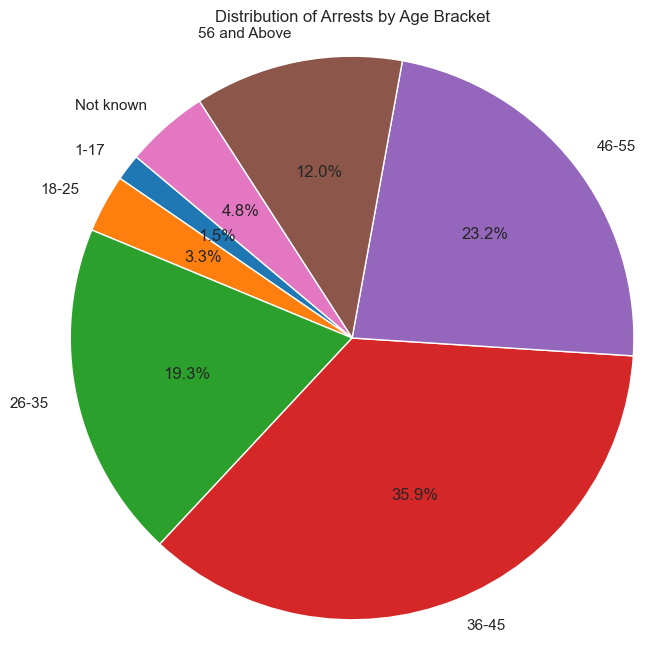

In [25]:
# Importing libraries
import matplotlib.pyplot as plt

# Define age ranges and corresponding data for pie chart
age_ranges = ['1-17', '18-25', '26-35', '36-45', '46-55', '56 and Above', 'Not known']
data_plot = df['Stop Resolution'].groupby(df['Subject Age Group']).sum()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(data_plot, labels=age_ranges, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribution of Arrests by Age Bracket')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## Distribution of Weapon Types Across Age Groups (Violin Plot)

To visualize the distribution of weapon types across different age groups, we can use a violin plot. Each violin represents the kernel density estimation of the distribution of weapon types within a specific age group. Here's the markdown representation:


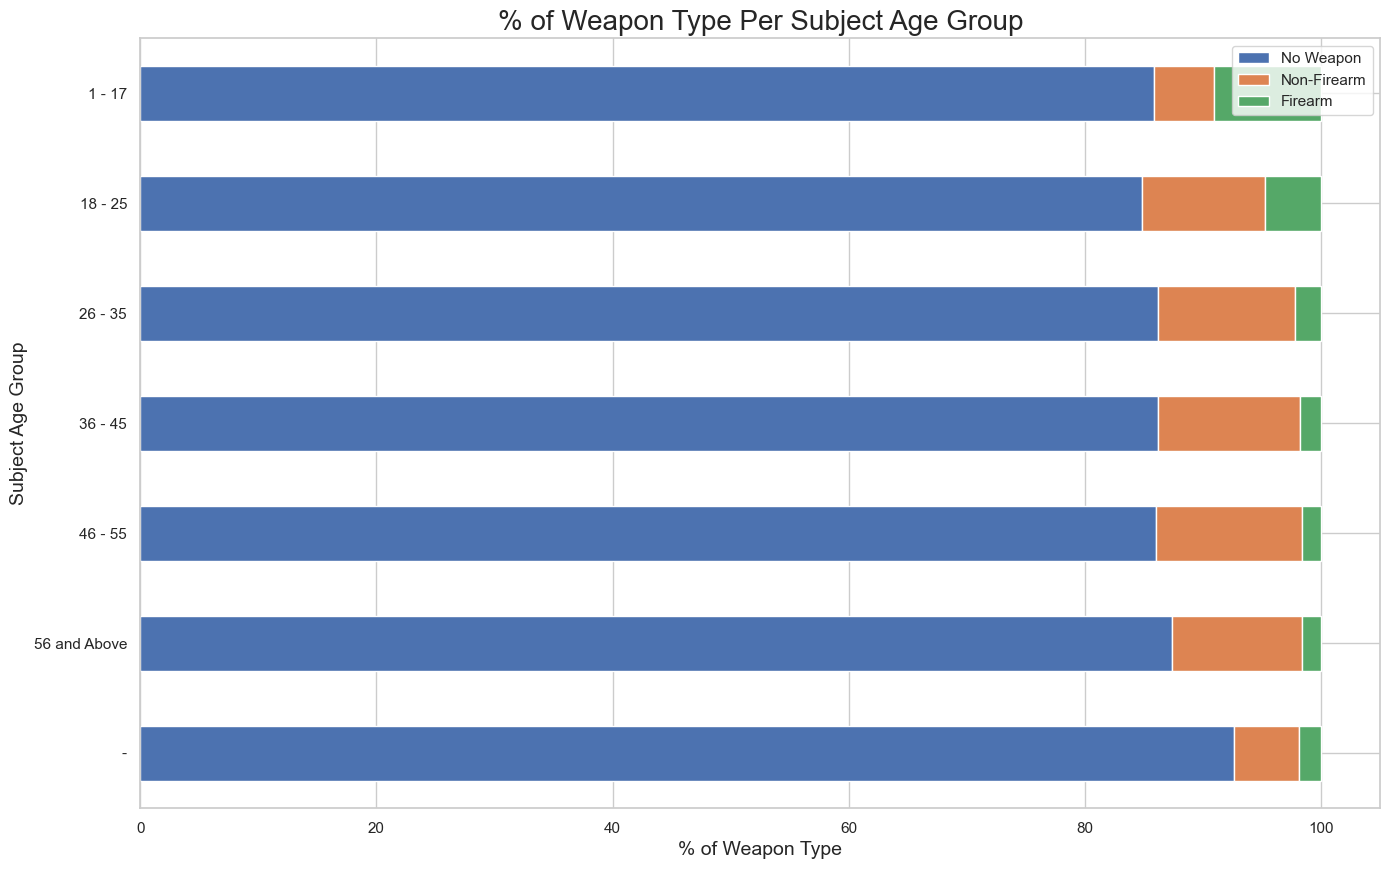

In [26]:
# Collect all rows of data were there was no weapon:
no_weapon = df[df['Weapon Type']=='None']

#Calculate the percent of cases where no weapon was present compared to the total number of terry stops per age group:
no_weapon_grouped = (no_weapon['Weapon Type'].groupby(df['Subject Age Group']).count() / 
                     df['Weapon Type'].groupby(df['Subject Age Group']).count())*100

# Re-order to be in the correct order by age range:
no_weapon_grouped = no_weapon_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55","56 and Above","-"])
# Turn into a dataframe:
no_weapon_final = pd.DataFrame(no_weapon_grouped)

# Collect all rows of data were there was a firearm:
firearm = df[df['Weapon Type']=='Firearm']
firearm_grouped = (firearm['Weapon Type'].groupby(df['Subject Age Group']).count() / 
                   df['Weapon Type'].groupby(df['Subject Age Group']).count())*100
firearm_grouped = firearm_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55","56 and Above","-"])
firearm_final = pd.DataFrame(firearm_grouped)

# Collect all rows of data were there was a non-firearm weapon:
non_firearm = df[df['Weapon Type']=='Non-Firearm']
non_firearm_grouped = (non_firearm['Weapon Type'].groupby(df['Subject Age Group']).count() /
                       df['Weapon Type'].groupby(df['Subject Age Group']).count())*100
non_firearm_grouped = non_firearm_grouped.reindex(["1 - 17", "18 - 25", "26 - 35","36 - 45","46 - 55",
                                                   "56 and Above","-"])
non_firearm_final = pd.DataFrame(non_firearm_grouped)

# Combine the above 3 dataframes into one dataframe and reset the index column:
combined_weapon = pd.concat([no_weapon_final,non_firearm_final,firearm_final],axis=1)
combined_weapon.reset_index(inplace=True)

# Create a bar chart comparing the % of arrests during the terry stop vs. % of arrests as a final resolution:
combined_weapon.plot(x='Subject Age Group',y="Weapon Type",kind="barh",stacked=True,figsize=(16,10))
plt.gca().invert_yaxis() # reverse order of y-axis so 1-17 is at the top

# Add chart title, labels, and legend
plt.title('% of Weapon Type Per Subject Age Group', fontsize=20)
plt.xlabel('% of Weapon Type', fontsize=14)
plt.ylabel('Subject Age Group', fontsize=14)
plt.legend(labels=['No Weapon','Non-Firearm','Firearm']);

# Visualizing Arrests by Weapon Type and Age Group:

To visualize the distribution of arrests based on weapon type and age group, we create a swarm plot using Seaborn.


In [27]:
# Importing libraries
'''import seaborn as sns
import matplotlib.pyplot as plt

# Use only data where an arrest was made
arrested = df[df['Stop Resolution'] == 1]

# Create swarm plot
plt.figure(figsize=(15, 6))
sns.swarmplot(data=arrested, x='Weapon Type', y='Subject Age Group', palette='Set2')

# Add chart title and labels
plt.title('Distribution of Arrests by Weapon Type and Age Group', fontsize=16)
plt.xlabel('Weapon Type', fontsize=14)
plt.ylabel('Subject Age Group', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show() '''


"import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Use only data where an arrest was made\narrested = df[df['Stop Resolution'] == 1]\n\n# Create swarm plot\nplt.figure(figsize=(15, 6))\nsns.swarmplot(data=arrested, x='Weapon Type', y='Subject Age Group', palette='Set2')\n\n# Add chart title and labels\nplt.title('Distribution of Arrests by Weapon Type and Age Group', fontsize=16)\nplt.xlabel('Weapon Type', fontsize=14)\nplt.ylabel('Subject Age Group', fontsize=14)\nplt.xticks(rotation=45)  # Rotate x-axis labels for better readability\nplt.tight_layout()  # Adjust layout\nplt.show() "

# Analyzing Arrests by Officer Gender:

To analyze the distribution of arrests based on officer gender, we remove rows where officer gender was unidentified and then calculate the counts and percentages of arrests by gender.


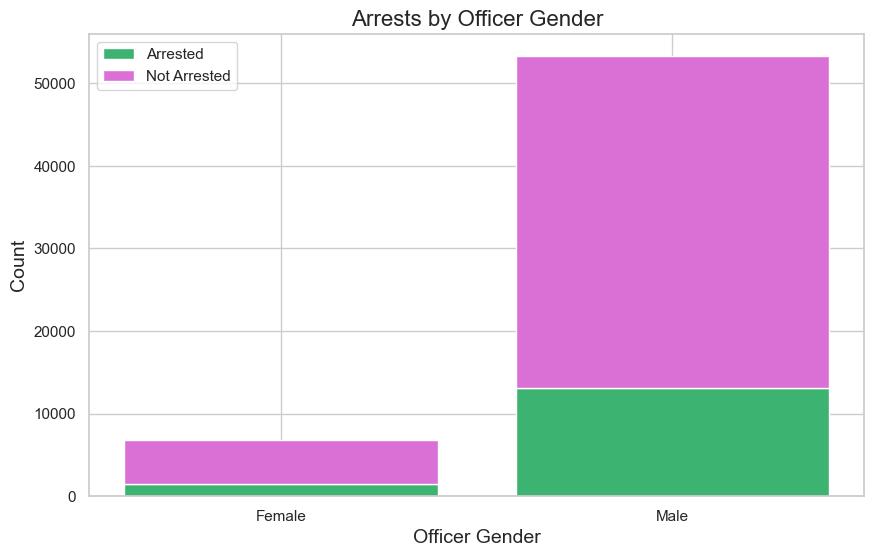

In [30]:
import matplotlib.pyplot as plt

# Remove rows where officer gender was unidentified:
df = df[df['Officer Gender'] != 'N']

# Filter the data for arrests
arrested_data = df[df['Stop Resolution'] == 1]

# Calculate the counts of arrests by gender
arrests_by_gender = arrested_data['Officer Gender'].value_counts()

# Calculate the counts of arrests for female officers
female_arrests_count = len(arrested_data[arrested_data['Officer Gender'] == 'F'])
female_not_arrested_count = len(df[df['Officer Gender'] == 'F']) - female_arrests_count

# Calculate the counts of arrests for male officers
male_arrests_count = len(arrested_data[arrested_data['Officer Gender'] == 'M'])
male_not_arrested_count = len(df[df['Officer Gender'] == 'M']) - male_arrests_count

# Set up data for stacked bar chart
categories = ['Female', 'Male']
arrested = [female_arrests_count, male_arrests_count]
not_arrested = [female_not_arrested_count, male_not_arrested_count]

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, arrested, color='mediumseagreen', label='Arrested')
plt.bar(categories, not_arrested, color='orchid', bottom=arrested, label='Not Arrested')

# Add labels and title
plt.xlabel('Officer Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Arrests by Officer Gender', fontsize=16)
plt.legend()

# Show plot
plt.show()


<h1>Exploring further our data</h1>

In [31]:
# Determine the percentage of arrests for each precinct
arrested_precinct = df[df['Stop Resolution'] == 1]
arrested_precinct_grouped = (arrested_precinct['Stop Resolution'].groupby(df['Precinct']).count() / 
                             df['Stop Resolution'].groupby(df['Precinct']).count()) * 100
arrested_precinct_final = pd.DataFrame(arrested_precinct_grouped)

# Determine the percentage of non-arrests for each precinct
non_arrested_precinct = df[df['Stop Resolution'] == 0]
non_arrested_precinct_grouped = (non_arrested_precinct['Stop Resolution'].groupby(df['Precinct']).count() / 
                                 df['Stop Resolution'].groupby(df['Precinct']).count()) * 100
non_arrested_precinct_final = pd.DataFrame(non_arrested_precinct_grouped)

# Combine the data into one dataframe
combined_precinct = pd.concat([df['Precinct'].value_counts(), arrested_precinct_final, non_arrested_precinct_final], axis=1)
combined_precinct.columns = ['# of Terry Stops', '% Arrested', '% Not Arrested']
combined_precinct


,# of Terry Stops,% Arrested,% Not Arrested
Precinct,,,
West,16444,30.430552,69.569448
North,12733,24.699599,75.300401
-,10574,3.830149,96.169851
East,8048,31.933400,68.066600
South,7283,30.825209,69.174791
Southwest,4671,25.561978,74.438022
Unknown,200,25.500000,74.500000
OOJ,97,7.216495,92.783505
FK ERROR,22,18.181818,81.818182


In [32]:
df

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year,Officer Age
0,26 - 35,33946824861,0,None,M,N,N,West,May,2022,41
1,-,342036,0,NaN,F,N,N,-,November,2017,50
2,26 - 35,8628041748,1,None,M,Y,N,Southwest,July,2019,47
3,36 - 45,217915,0,NaN,M,N,N,North,December,2016,49
4,46 - 55,60297,0,Non-Firearm,F,N,Y,East,July,2015,50
...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,8252118453,0,None,F,N,Y,South,May,2019,29
60098,36 - 45,13172913355,1,None,M,Y,N,West,May,2020,33
60099,26 - 35,30544207813,1,None,M,Y,N,-,December,2021,28
60100,26 - 35,546819,1,NaN,F,N,N,East,March,2019,28


## Splitting the Dataset into Train and Test Sets:

To prepare the data for modeling, we split it into two subsets: one for training the model and one for testing its performance. This helps us evaluate how well the model generalizes to new, unseen data.


Modelling part


In [33]:
# Split into train and test sets:
X = df.loc[:, ['Month', 'Year', 'Precinct', 'Subject Age Group', 'Officer Age', 'Officer Gender', 'Weapon Type', 'Arrest Flag', 'Frisk Flag']]

y = df.loc[:, 'Stop Resolution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## One-Hot Encoding Categorical Features:

In many machine learning algorithms, categorical variables need to be converted into numerical format for model training. One common technique for this is one-hot encoding.


In [34]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instantiate and fit the OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train)

# Transform the training and testing data
X_train_ohe = ohe.transform(X_train).toarray()
X_test_ohe = ohe.transform(X_test).toarray()

# Retrieve feature names after one-hot encoding
feature_names = ohe.get_feature_names_out(input_features=X_train.columns)

# Create DataFrames for both training and testing data
ohe_df_train = pd.DataFrame(X_train_ohe, columns=feature_names)
ohe_df_test = pd.DataFrame(X_test_ohe, columns=feature_names)

# Concatenate the DataFrames
ohe_df = pd.concat([ohe_df_train, ohe_df_test], ignore_index=True)


# Define Confusion Matrix Plotting Function:

This function plots a confusion matrix to visualize the performance of a classification model.



In [37]:
# Define Confusion Matrix:
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
   
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add labels to each cell:
    thresh = cm.max() / 2.
    # loop through confusion matrix and append labels to the plot:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
 
    plt.colorbar()
    plt.show()
    

class_names = ['Arrested','Not Arrested']

k nearest

# Determining the Best Value for k in K-Nearest Neighbors:

To find the optimal value for the hyperparameter k in the K-Nearest Neighbors (KNN) algorithm, we can evaluate the model's performance across different values of k.


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25, step=1):
    '''This function will determine which k value is optimal to use for knn classification by selecting the k value
    with the highest overall accuracy score.
    Inputs:
    X_train, y_train, X_test, y_test: train and test set values
    min_k: minimum value to try for k
    max_k: maximum value to try for k
    step: step size for k values
    '''
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k + 1, step):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
        print("k: {}, Accuracy: {}".format(k, accuracy))
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))
    
# Example usage:
# find_best_k(X_train_ohe, y_train, X_test_ohe, y_test)


# Creating the K-Nearest Neighbors (KNN) Classifier and Evaluating Performance:

To assess the performance of the KNN classifier, we create the model, fit it to the training data, make predictions on the test set, and evaluate various performance metrics.


KNN Accuracy:  86.10587060259682 %
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     13703
           1       0.90      0.48      0.62      4319

    accuracy                           0.86     18022
   macro avg       0.88      0.73      0.77     18022
weighted avg       0.87      0.86      0.84     18022



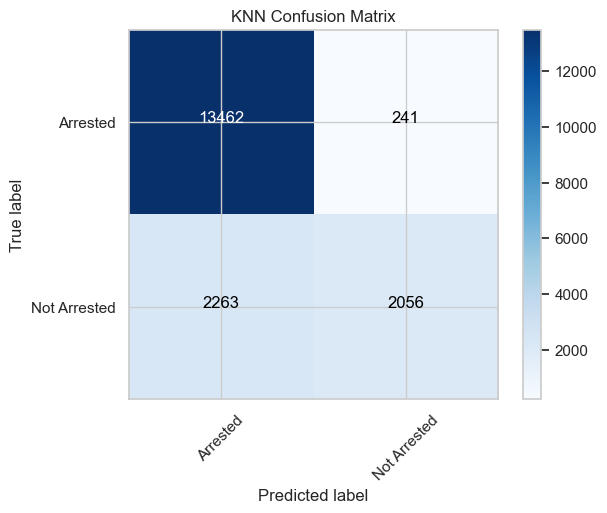

In [40]:
# Create the classifier, fit it on the training data and make predictions on the test set:
knn = KNeighborsClassifier(n_neighbors = 25, algorithm='brute')
knn.fit(X_train_ohe, y_train)
y_pred = knn.predict(X_test_ohe)

# Check the Accuracy:
print('KNN Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Check the AUC:

# Print classification report:
print(classification_report(y_test, y_pred))


# Confusion Matrix for KNN:
cm_knn = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_knn, classes=class_names, title='KNN Confusion Matrix')

logistic regression

# Creating and Evaluating Logistic Regression Classifier:

To evaluate the performance of the Logistic Regression classifier, we create the model, fit it to the training data, make predictions on the test set, and assess various performance metrics.


Logistic Regression Accuracy:  86.21129730329598 %
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     13703
           1       0.93      0.46      0.61      4319

    accuracy                           0.86     18022
   macro avg       0.89      0.72      0.77     18022
weighted avg       0.87      0.86      0.84     18022



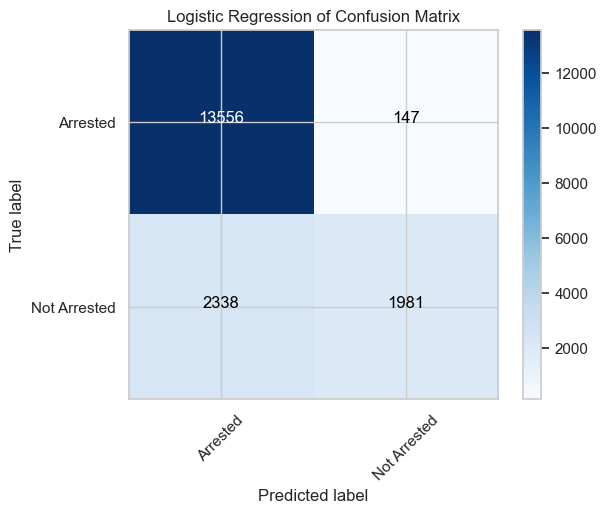

In [ ]:


# Create the classifier, fit it on the training data and make predictions on the test set:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_ohe, y_train)
y_pred = logistic_regression.predict(X_test_ohe)

# Check the Accuracy:
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Logistic Regression:
cm_LR = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_LR, classes=class_names, title='Logistic Regression of Confusion Matrix')

# Performing Randomized Search for Hyperparameter Tuning in Random Forest Classifier:

To find the optimal hyperparameters for the Random Forest Classifier, we perform a randomized search over a defined parameter space.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distributions with reduced ranges
param_dist = {
    'n_estimators': randint(80, 121),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_split': randint(2, 6)
}

# Instantiate the RandomForestClassifier
forest = RandomForestClassifier()

# Perform randomized search with parallel processing
forest_random_search = RandomizedSearchCV(forest, param_dist, cv=3, n_iter=50, n_jobs=-1)

# Fit the randomized search to the data
forest_random_search.fit(X_train_ohe, y_train)

# Print the best parameters found
print("Best parameters found:", forest_random_search.best_params_)



Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 103}


# Creating and Evaluating Random Forest Classifier:

To assess the performance of the Random Forest classifier, we create the model with pre-defined hyperparameters, fit it to the training data, make predictions on the test set, and evaluate various performance metrics.


Random Forest Accuracy:  86.97147930307402 %
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     13703
           1       0.84      0.56      0.67      4319

    accuracy                           0.87     18022
   macro avg       0.86      0.76      0.80     18022
weighted avg       0.87      0.87      0.86     18022



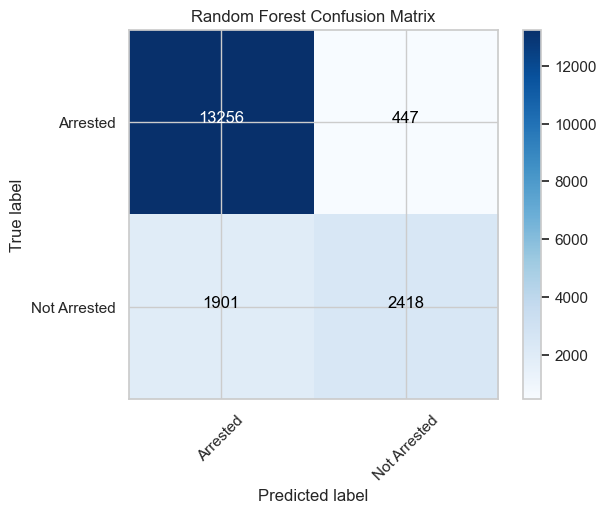

In [ ]:
# Create the classifier, fit it on the training data and make predictions on the test set:
rforest = RandomForestClassifier(n_estimators=80, criterion = 'gini',max_depth=None, max_features=5, 
                                 min_samples_split=5)
rforest.fit(X_train_ohe, y_train)
y_pred = rforest.predict(X_test_ohe)

# Check the Accuracy:
print('Random Forest Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Random Forest:
cm_forest = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_forest, classes=class_names, title='Random Forest Confusion Matrix')

Decision trees


# Determining Optimal Parameters for Decision Tree Classifier:

To find the optimal parameters for the Decision Tree classifier, we perform a grid search over a defined parameter grid.


Decision Tree Accuracy:  86.26123626678503 %
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     13703
           1       1.00      0.43      0.60      4319

    accuracy                           0.86     18022
   macro avg       0.92      0.71      0.76     18022
weighted avg       0.88      0.86      0.84     18022



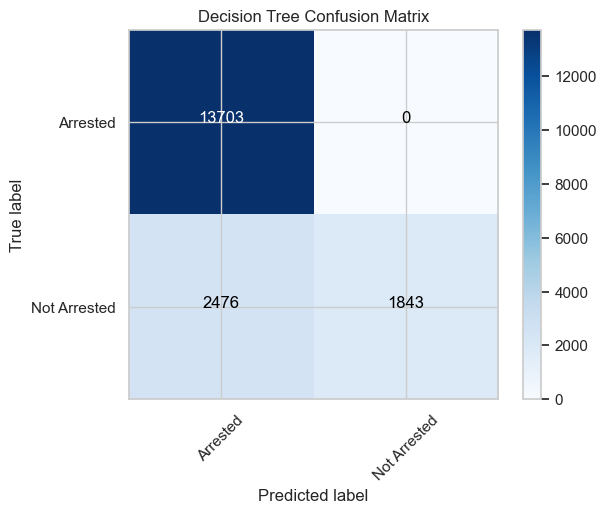

In [46]:
d_tree = DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2)
d_tree = d_tree.fit(X_train_ohe, y_train)
y_pred = d_tree.predict(X_test_ohe)

# Check the Accuracy:
print('Decision Tree Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Decision Tree
cm_dtree = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_dtree, classes=class_names, title='Decision Tree Confusion Matrix')

# Calculating Feature Importances and Visualizing Top Features:

To gain insights into the most influential features used by the Random Forest classifier, we calculate the feature importances and visualize the top 30 features.


In [51]:
# Determine optimal parameters:
# Declare a baseline classifier:
forest = RandomForestClassifier()

# Create a parameter grid and grid search:           
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_depth' : [None],
              'max_features': range(1,11), 
              'min_samples_split': range(1,6)}
forest_grid_search = GridSearchCV(forest, param_grid, cv=5, n_jobs=-1)

# Fit the tuned parameters:
forest_grid_search.fit(X_train_ohe, y_train)

# Printing best estimator parameters:
print(forest_grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
import numpy as np

# Calculate feature importances
feature_importances = pd.Series(rforest.feature_importances_, index=ohe_df.columns)

# Select the top 30 most influential features
top_features = feature_importances.nlargest(30)

# Create a vertical bar plot with custom styling
plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))  # Gradient color scheme
top_features.sort_values().plot(kind='bar', color=colors, edgecolor='black')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Top 30 Most Influential Features with Random Forest')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


NameError: name 'rforest' is not defined

<h1>Outro</h1>

Following the assessment of all four classification models, Random Forests emerged as the most accurate with an accuracy rate of 86.35%, closely followed by Decision Tree at 79.96%, Logistic Regression at 79.92%, and KNN at  86.71%. While each model performed well, Random Forests exhibited a slight advantage in predictive accuracy.

Utilizing the Random Forest model allows for the accurate prediction of whether a Terry Stop led to an arrest 81.19% of the time. This underscores the significance of certain features in determining arrest outcomes, with the precinct and the presence of an arrest flag being particularly influential. The top five features identified include: 1) Arrest Flag given, 2) Arrest Flag not given, 3) Unknown precinct, 4) West Precinct, and 5) Frisk Flag given. Understanding these features provides crucial insights into the circumstances most likely to result in an arrest during a Terry Stop.

### Recommendations:
1. **Officer Training Enhancement**: Enhancing training programs to help officers recognize appropriate arrest times during Terry Stops versus instances where waiting may be more prudent can lead to improved decision-making and potentially reduce unnecessary arrests.
2. **Improved Data Collection**: Ensuring consistent recording of the officer's precinct for all Terry Stops can significantly enhance the accuracy of future predictive models. This data has proven to be a significant predictor of arrest outcomes and its reliable capture is vital for model accuracy.
3. **Frisk Protocol Refinement**: Providing comprehensive training on when to conduct frisks during Terry Stops can aid officers in making informed decisions and potentially enhance the accuracy of predicting arrest outcomes.

### Next Steps:
While achieving an accuracy rate of 80% is commendable, there remains scope for improvement. Future endeavors should focus on refining the model through additional data cleaning and feature refinement. Addressing any remaining inconsistencies or missing data and considering the integration of new, relevant features could enhance predictive accuracy.

Furthermore, exploring advanced modeling techniques, including deep learning, could further enhance the model's performance. These sophisticated techniques have the potential to uncover intricate patterns within the data that traditional models may overlook. Integrating such methods could lead to the development of a more accurate and robust predictive model for Terry Stop outcomes.

In conclusion, the insights gleaned from this project offer valuable guidance on the factors influencing arrest outcomes during Terry Stops. By implementing the recommended enhancements in training and data collection practices, and leveraging advanced modeling techniques, law enforcement agencies can enhance their predictive capabilities. This, in turn, can inform more effective policing strategies, improve decision-making, and contribute to enhanced safety for both officers and the public.